In [1]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline
import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 
import snscrape.modules.twitter as sntwitter
import pandas as pd
query="ADHD PSTD  lang:en until:2021-12-01 since:2010-01-01 filter:replies" 
tweets=[]
limit=700

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break
      if len(tweets)==limit:
        break
      else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount,tweet.retweetCount])
        
df1=pd.DataFrame(tweets,columns=['Date', 'ID', 'url', 'username', 'source', 'location', 'Tweet', 'num_of_likes', 'num_of_retweet'])


import snscrape.modules.twitter as sntwitter
import pandas as pd

query="depression lang:en until:2021-12-01 since:2010-01-01 filter:replies" 
tweets=[]
limit=5000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break
      if len(tweets)==limit:
        break
      else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount,tweet.retweetCount])
        
df2=pd.DataFrame(tweets,columns=['Date', 'ID', 'url', 'username', 'source', 'location', 'Tweet', 'num_of_likes', 'num_of_retweet'])
import snscrape.modules.twitter as sntwitter
import pandas as pd

query="bipolar disorder lang:en until:2021-12-01 since:2010-01-01 filter:replies" 
tweets=[]
limit=2500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break
      if len(tweets)==limit:
        break
      else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount,tweet.retweetCount])
        
df3=pd.DataFrame(tweets,columns=['Date', 'ID', 'url', 'username', 'source', 'location', 'Tweet', 'num_of_likes', 'num_of_retweet'])

import snscrape.modules.twitter as sntwitter
import pandas as pd

query="social anxiety disorder lang:en until:2021-12-01 since:2010-01-01 filter:replies" 
tweets=[]
limit=1200

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break
      if len(tweets)==limit:
        break
      else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount,tweet.retweetCount])
        
df4=pd.DataFrame(tweets,columns=['Date', 'ID', 'url', 'username', 'source', 'location', 'Tweet', 'num_of_likes', 'num_of_retweet'])
mental=pd.concat([df1,df2,df3,df4],axis=0)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text
# Data Cleaning
Data = mental.drop_duplicates('Tweet',keep='first')
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
#     tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
Data['tweet'] = Data['Tweet'].map(lambda x: cleaner(x))

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\dell\AppData\Local\Temp\ipykernel_2300\1701063933.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['tweet'] = Data['Tweet'].map(lambda x: cleaner(x))


In [3]:
Data

,Date,ID,url,username,source,location,Tweet,num_of_likes,num_of_retweet,tweet
0,2021-11-12 02:40:42+00:00,1458988091595706391,https://twitter.com/mykola/status/145898809159...,mykola,Twitter Web App,Chapel Perilous,Right now I have a big request from the larger...,10,4,Right now I have a big request from the Univer...
1,2021-10-11 10:35:38+00:00,1447511202121216005,https://twitter.com/ItzJessticle/status/144751...,ItzJessticle,Twitter Web App,,@jonmosesvocals i have generalized anxiety dis...,1,0,"i have generalized anxiety disorder , panic di..."
2,2021-10-09 17:59:08+00:00,1446898037796876289,https://twitter.com/V4MPEDUP/status/1446898037...,V4MPEDUP,Twitter for iPhone,19+ N/SFW (21ooc) NO TWS,𝙸𝙻𝙻𝙽𝙴𝚂𝚂𝙴𝚂 𝙿𝙾𝚁𝚃𝚁𝙰𝚈𝙴𝙳\n\n- Manic Depression(BP 1...,2,0,- Manic Depression ( 1 ) w / Agoraphobia and P...
3,2021-10-02 06:41:57+00:00,1444190902386233348,https://twitter.com/txrquoissee/status/1444190...,txrquoissee,Twitter for Android,,adhd\npsychosis (when i'm deprived of sleep)\n...,0,0,psychosis ( when i ' m of sleep ) ko kung may ...
4,2021-08-22 04:23:40+00:00,1429298198137516034,https://twitter.com/hopeneedslove/status/14292...,hopeneedslove,Twitter Web App,,i have ocd and im afird that if i think someth...,0,0,i have and that if i think something bad it wi...
...,...,...,...,...,...,...,...,...,...,...
1195,2021-06-05 00:39:10+00:00,1400975447488450562,https://twitter.com/agowdy/status/140097544748...,agowdy,Twitter for iPhone,"Mississippi, USA",@daralynn13 How dare you have symptoms differe...,0,0,How dare you have different than that of unive...
1196,2021-06-04 20:37:24+00:00,1400914604692213766,https://twitter.com/Mbrusdahl/status/140091460...,Mbrusdahl,Twitter for Android,,@ElvisRotten Social anxiety disorder over here😁,2,0,Social anxiety disorder over here 😁
1197,2021-06-04 19:58:38+00:00,1400904849349349377,https://twitter.com/cowsofoblivion/status/1400...,cowsofoblivion,Twitter for iPhone,somewhere in new york state,@_macey23 And this is coming from someone with...,0,0,And this is coming from someone with social an...
1198,2021-06-04 19:22:08+00:00,1400895665132261378,https://twitter.com/CacklingFox/status/1400895...,CacklingFox,Twitter for Android,,@Rizabellepow @sullypov @Juimper @daralynn13 P...,2,0,Phone anxiety is legit and fairly common . It ...


In [7]:
# SENTIMENT ANALYSIS STAGE
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [11]:
# using the functions to get the polarity and sentiment
Data['Polarity'] = Data['tweet'].apply(polarity)
Data['Sentiment'] = Data['Polarity'].apply(sentimenttextblob)
sent = Data['Sentiment'].value_counts()
sent

C:\Users\dell\AppData\Local\Temp\ipykernel_2300\3433662547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Polarity'] = Data['tweet'].apply(polarity)
C:\Users\dell\AppData\Local\Temp\ipykernel_2300\3433662547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sentiment'] = Data['Polarity'].apply(sentimenttextblob)


Positive    4228
Negative    2487
Neutral     2060
Name: Sentiment, dtype: int64

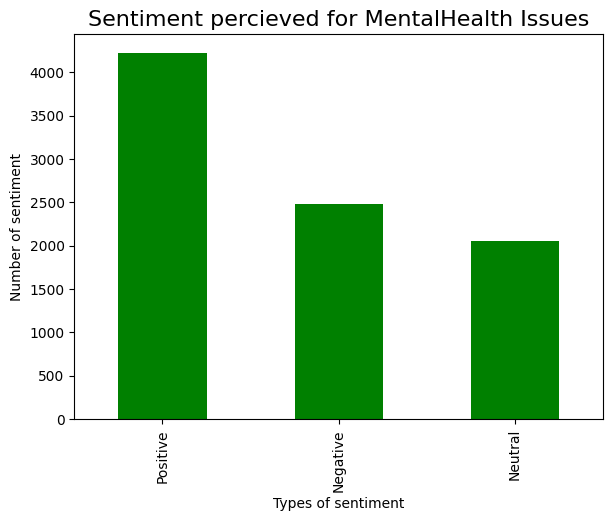

In [12]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment percieved for MentalHealth Issues', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

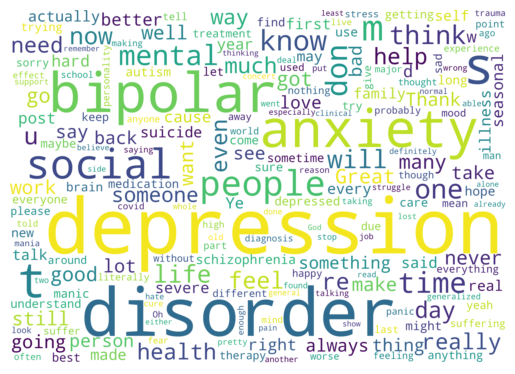

In [14]:
tweets_string = Data['tweet'].tolist()
tweets_string = " ".join(tweets_string)
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
Data

,Date,ID,url,username,source,location,Tweet,num_of_likes,num_of_retweet,tweet,Polarity,Sentiment
0,2021-11-12 02:40:42+00:00,1458988091595706391,https://twitter.com/mykola/status/145898809159...,mykola,Twitter Web App,Chapel Perilous,Right now I have a big request from the larger...,10,4,Right now I have a big request from the Univer...,0.196429,Positive
1,2021-10-11 10:35:38+00:00,1447511202121216005,https://twitter.com/ItzJessticle/status/144751...,ItzJessticle,Twitter Web App,,@jonmosesvocals i have generalized anxiety dis...,1,0,"i have generalized anxiety disorder , panic di...",0.062500,Positive
2,2021-10-09 17:59:08+00:00,1446898037796876289,https://twitter.com/V4MPEDUP/status/1446898037...,V4MPEDUP,Twitter for iPhone,19+ N/SFW (21ooc) NO TWS,𝙸𝙻𝙻𝙽𝙴𝚂𝚂𝙴𝚂 𝙿𝙾𝚁𝚃𝚁𝙰𝚈𝙴𝙳\n\n- Manic Depression(BP 1...,2,0,- Manic Depression ( 1 ) w / Agoraphobia and P...,0.600000,Positive
3,2021-10-02 06:41:57+00:00,1444190902386233348,https://twitter.com/txrquoissee/status/1444190...,txrquoissee,Twitter for Android,,adhd\npsychosis (when i'm deprived of sleep)\n...,0,0,psychosis ( when i ' m of sleep ) ko kung may ...,-0.100000,Negative
4,2021-08-22 04:23:40+00:00,1429298198137516034,https://twitter.com/hopeneedslove/status/14292...,hopeneedslove,Twitter Web App,,i have ocd and im afird that if i think someth...,0,0,i have and that if i think something bad it wi...,-0.700000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021-06-05 00:39:10+00:00,1400975447488450562,https://twitter.com/agowdy/status/140097544748...,agowdy,Twitter for iPhone,"Mississippi, USA",@daralynn13 How dare you have symptoms differe...,0,0,How dare you have different than that of unive...,0.058333,Positive
1196,2021-06-04 20:37:24+00:00,1400914604692213766,https://twitter.com/Mbrusdahl/status/140091460...,Mbrusdahl,Twitter for Android,,@ElvisRotten Social anxiety disorder over here😁,2,0,Social anxiety disorder over here 😁,0.033333,Positive
1197,2021-06-04 19:58:38+00:00,1400904849349349377,https://twitter.com/cowsofoblivion/status/1400...,cowsofoblivion,Twitter for iPhone,somewhere in new york state,@_macey23 And this is coming from someone with...,0,0,And this is coming from someone with social an...,0.047917,Positive
1198,2021-06-04 19:22:08+00:00,1400895665132261378,https://twitter.com/CacklingFox/status/1400895...,CacklingFox,Twitter for Android,,@Rizabellepow @sullypov @Juimper @daralynn13 P...,2,0,Phone anxiety is legit and fairly common . It ...,-0.130556,Negative
